# Anomaly Detection-2

#### Q1. What is the role of feature selection in anomaly detection?

The role of feature selection in anomaly detection is crucial. Feature selection involves choosing the most relevant attributes or features from your dataset while discarding irrelevant or redundant ones. Feature selection can impact anomaly detection in the following ways:
* Improved Performance: Selecting the right features can enhance the performance of anomaly detection algorithms by focusing on the most informative aspects of the data.
* Reduced Complexity: It can simplify the anomaly detection process by reducing the dimensionality of the data, which can be especially useful when dealing with high-dimensional datasets.
* Enhanced Interpretability: Feature selection can make the results of anomaly detection more interpretable by highlighting the key factors contributing to anomalies.

#### Q2. What are some common evaluation metrics for anomaly detection algorithms and how are they computed?

Common evaluation metrics for anomaly detection algorithms include:
* True Positives (TP): The number of true anomalies correctly identified.
* False Positives (FP): The number of normal data points incorrectly identified as anomalies.
* True Negatives (TN): The number of correctly identified normal data points.
* False Negatives (FN): The number of actual anomalies not detected.

Common metrics computed from these values include:
* Precision: TP / (TP + FP) - Measures the accuracy of detected anomalies.
* Recall: TP / (TP + FN) - Measures the ability to identify all anomalies.
* F1-Score: 2 * (Precision * Recall) / (Precision + Recall) - Balances precision and recall.
* Area Under the Receiver Operating Characteristic (ROC-AUC): Measures the algorithm's ability to distinguish between normal and anomalous data.

#### Q3. What is DBSCAN and how does it work for clustering?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. It works by identifying clusters of data points in a high-dimensional space based on their density. DBSCAN defines clusters as dense regions of data points separated by areas of lower point density. It can discover clusters of arbitrary shapes and is effective in handling noisy data.

#### Q4. How does the epsilon parameter affect the performance of DBSCAN in detecting anomalies?

The epsilon parameter (often denoted as ε) in DBSCAN determines the radius within which data points are considered neighbors. It significantly affects the performance of DBSCAN in detecting anomalies. A small ε value may result in many data points being classified as noise, making it sensitive to small local variations. On the other hand, a large ε value may merge clusters, potentially masking anomalies. Finding the right ε value is crucial for effective anomaly detection, and it often requires experimentation and domain knowledge.

#### Q5. What are the differences between the core, border, and noise points in DBSCAN, and how do they relate to anomaly detection?

In DBSCAN:
* Core Points: These are data points that have at least "min_samples" data points within a distance of ε. They are the central points of clusters.
* Border Points: These are data points that are within ε distance of a core point but do not meet the "min_samples" criterion themselves. They belong to a cluster but are not central.
* Noise Points: These are data points that do not belong to any cluster and are not within ε distance of a core point. Noise points are often considered anomalies because they don't fit well into any cluster.

Anomalies are typically detected among noise points and sometimes among border points, as they deviate from the typical cluster patterns.

#### Q6. How does DBSCAN detect anomalies and what are the key parameters involved in the process?

DBSCAN detects anomalies by classifying data points that are considered noise (i.e., not part of any cluster) as anomalies. The key parameters involved in the process are:
* Epsilon (ε): The radius within which data points are considered neighbors.
* Min_samples: The minimum number of data points within ε required to form a core point.

Anomalies are detected among the data points classified as noise.

#### Q7. What is the make_circles package in scikit-learn used for?

The make_circles package in scikit-learn is used to generate a synthetic dataset where the data points are arranged in concentric circles. This dataset is often used for testing and illustrating clustering and classification algorithms, especially when dealing with non-linearly separable data.

#### Q8. What are local outliers and global outliers, and how do they differ from each other?

Local outliers and global outliers refer to two different perspectives in anomaly detection:
* Local Outliers: These are data points that are outliers in their local neighborhoods but may not be outliers when considered in a global context. They are detected by algorithms like the Local Outlier Factor (LOF) and are sensitive to local variations in the data.
* Global Outliers: These are data points that are outliers when considered in the entire dataset, regardless of their local context. They are detected by algorithms like the Isolation Forest and are insensitive to local variations.

The key difference is that local outliers focus on the immediate surroundings of data points, while global outliers consider the entire dataset.

#### Q9. How can local outliers be detected using the Local Outlier Factor (LOF) algorithm?

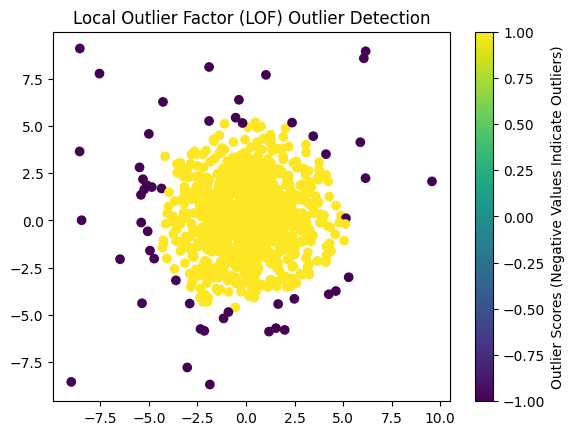

In [1]:
import numpy as ny
import matplotlib.pyplot as pt
from sklearn.neighbors import LocalOutlierFactor as lof
# Generate a synthetic dataset with anomalies
ny.random.seed(42)
ndata = ny.random.randn(1000, 2) * 2  # Normal data points
andata = ny.random.uniform(low=-10, high=10, size=(20, 2))  # Anomalies
# Combine normal data and anomalies
data = ny.vstack((ndata, andata))
# Create a LOF model
model = lof(n_neighbors=20, contamination=0.05)
# Fit the model to the data and predict outliers
outlier = model.fit_predict(data)
# Plot the data points and color outliers
pt.scatter(data[:, 0], data[:, 1], c=outlier, cmap='viridis')
pt.colorbar(label="Outlier Scores (Negative Values Indicate Outliers)")
pt.title("Local Outlier Factor (LOF) Outlier Detection")
pt.show()


#### Q10. How can global outliers be detected using the Isolation Forest algorithm?

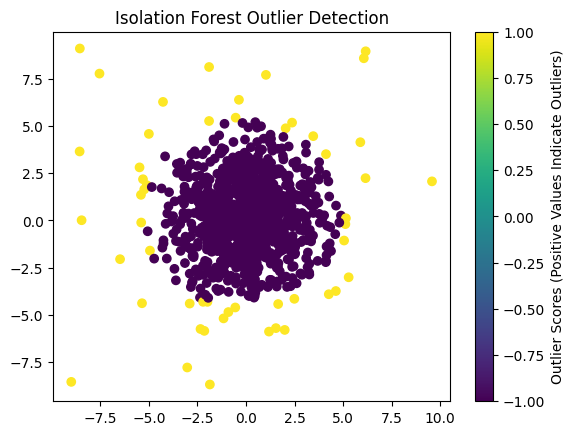

In [2]:
import numpy as ny
import matplotlib.pyplot as pt
from sklearn.ensemble import IsolationForest
# Generate a synthetic dataset with anomalies
ny.random.seed(42)
ndata = ny.random.randn(1000, 2) * 2  # Normal data points
andata = ny.random.uniform(low=-10, high=10, size=(20, 2))  # Anomalies
# Combine normal data and anomalies
data = ny.vstack((ndata, andata))
# Create an Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
# Fit the model to the data and predict outliers
outlier = -model.fit_predict(data)
# Plot the data points and color outliers
pt.scatter(data[:, 0], data[:, 1], c=outlier, cmap='viridis')
pt.colorbar(label="Outlier Scores (Positive Values Indicate Outliers)")
pt.title("Isolation Forest Outlier Detection")
pt.show()

#### Q11. What are some real-world applications where local outlier detection is more appropriate than global outlier detection, and vice versa?

* Real-world applications where local outlier detection is more appropriate include:
    * Fraud detection in financial transactions, where unusual patterns may occur in specific regions or time periods.
    * Network intrusion detection, where attacks may exhibit localized behavior.
    * Anomaly detection in sensor networks, where anomalies may be confined to specific sensor locations.
* Global outlier detection is more appropriate for:
    * Identifying rare diseases in a medical dataset, where anomalies are globally rare regardless of the patient's location.
    * Quality control in manufacturing, where defects may occur randomly across the entire production process.
    * Identifying global anomalies in time series data, such as detecting unusual trends across the entire time period.